# **Mentautkan sistem ke google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Memanggil library**

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras. applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix ,accuracy_score,cohen_kappa_score,roc_curve,auc,recall_score,precision_score,f1_score
from keras import optimizers
from tensorflow.keras import optimizers
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# **Memasukkan datasets**

In [ ]:
train_path = '/content/drive/My Drive/Portofolio Project/Project 1_Klasifikasi Pneumonia Covid/Dataset/train/'
test_path = '/content/drive/My Drive/Portofolio Project/Project 1_Klasifikasi Pneumonia Covid/Dataset/test/'
num_classes = 3

# **Membuat data latih**

In [ ]:
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(train_path, target_size=(224,224),color_mode='rgb',batch_size=64,shuffle=True)

Found 390 images belonging to 3 classes.


# **Membuat pemodelan VGG16**

In [ ]:
model = VGG16(weight='imagenet', include_top=True)
model.layers.pop()
new_layer = Dense(num_classes, activation='softmax', name='prediction_1')
model = Model(model.input, new_layer(model.layer[-1].output))

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
sgd = tf.keras.optimizers.legacy.SGD(lr=0.0001,decay=0.0001)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# **Melakukan pelatihan model VGG16**

In [ ]:
history = model.fit_generator(train_batches,epochs=20,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
7/7 [==============================] - 732s 100s/step - loss: 1.0991 - accuracy: 0.3179
Epoch 2/20
7/7 [==============================] - 714s 99s/step - loss: 1.0991 - accuracy: 0.3179
Epoch 3/20
7/7 [==============================] - 710s 99s/step - loss: 1.0991 - accuracy: 0.3179
Epoch 4/20
7/7 [==============================] - 707s 98s/step - loss: 1.0991 - accuracy: 0.3179
Epoch 5/20
7/7 [==============================] - 707s 99s/step - loss: 1.0991 - accuracy: 0.3179
Epoch 6/20
7/7 [==============================] - 709s 99s/step - loss: 1.0991 - accuracy: 0.3205
Epoch 7/20
7/7 [==============================] - 714s 100s/step - loss: 1.0991 - accuracy: 0.3179
Epoch 9/20
7/7 [==============================] - 708s 98s/step - loss: 1.0991 - accuracy: 0.3179
Epoch 10/20
7/7 [==============================] - 707s 98s/step - loss: 1.0991 - accuracy: 0.3154
Epoch 11/20
7/7 [==============================] - 707s 98s/step - loss: 1.0991 - accuracy: 0.3179
Epoch 12/20
7/7 

# **Melakukan prediksi data uji**

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_path,batch_size=64,shuffle=False,target_size=(224,224))
predicts_vectors = model.predict_generator(test_generator, verbose=1)

Found 150 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


3/3 [==============================] - 76s 22s/step


In [ ]:
pred = np.argmax(predicts_vectors,axis=1)

# **Melakukan validasi hasil prediksi data uji**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer ()

lb.fit(test_generator.labels)

y_test = lb.transform (test_generator.labels)
y_pred = lb.transform (pred)

auc_score = roc_auc_score(y_test, y_pred,average="macro")

In [ ]:
y_true = test_generator.labels
y_pred = pred

recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
kappa = cohen_kappa_score(test_generator.labels, pred)
acc = accuracy_score(test_generator.labels, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Melihat variabel uji yang akan diprediksi**
label 0 = Covid;
Label 1 = Pneumonia;
Label 2 = sehat

In [ ]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# **Melihat hasil prediksi model terhadap variabel uji**
label 0 = Covid;
Label 1 = Pneumonia;
Label 2 = sehat

In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


# **Evaluasi hasil prediksi model**

In [ ]:
print('>> Hasil Evaluasi <<')
print('Acc: {}'.format(acc*100))
print('Recall: {}'.format(recall*100))
print('Precision: {}'.format(precision*100))
print('F1-Acore: {}'.format(f1))
print('AUC: {}'.format(auc_score))
print('Kappa: {}'.format(kappa))

>> Hasil Evaluasi <<
Acc: 29.333333333333332
Recall: 29.333333333333332
Precision: 10.401891252955082
F1-Acore: 0.15357766143106458
AUC: 0.47000000000000003
Kappa: -0.06000000000000005


# **Hasil klasifikasi**
label 0 = Covid;
Label 1 = Pneumonia;
Label 2 = sehat

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.88      0.46        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.29       150
   macro avg       0.10      0.29      0.15       150
weighted avg       0.10      0.29      0.15       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


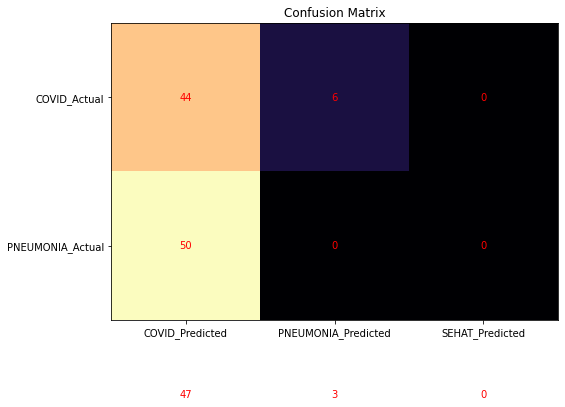

acc: 0.2933
sensitivity: 0.8800
specificity: 0.0000


In [ ]:
# compute the confusion matrix, accuracy, sensitivity, and specificity

cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1] + cm[2,2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0,2])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1] + cm[2,2])

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='magma')
ax.set_title("Confusion Matrix")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('COVID_Predicted', 'PNEUMONIA_Predicted', 'SEHAT_Predicted'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('COVID_Actual', 'PNEUMONIA_Actual', 'SEHAT_Actual'))
ax.set_ylim(1.5, -0.5)
for i in range(3):
    for j in range(3):
      ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))